# Discretization with K-means

In [1]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import KBinsDiscretizer
from yellowbrick.cluster import KElbowVisualizer

In [2]:
# load the California House price data from Scikit-learn
X, y = fetch_california_housing(return_X_y=True, as_frame=True)

# display top 5 rows
X.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [3]:
# let's separate the data into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.3,
    random_state=0,
)

X_train.shape, X_test.shape

((14448, 8), (6192, 8))

# Finding the optimal number of clusters

In [4]:
# The variables to transform:

variables = ["MedInc", "HouseAge", "AveRooms"]

In [5]:
# import matplotlib.pyplot as plt
# plt.rcParams["figure.dpi"] = 450

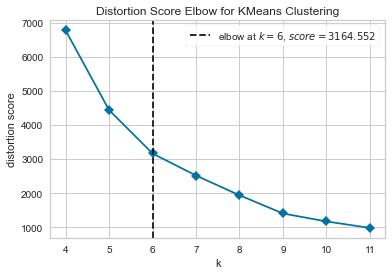

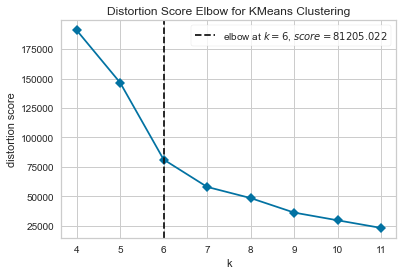

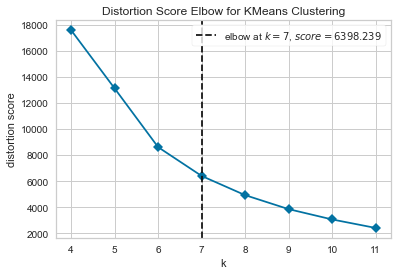

In [6]:
# set up a k-means clustering algorithm
k_means = KMeans(random_state=10)

# we test every variable
for variable in variables:

    # set up a visualiser
    visualizer = KElbowVisualizer(
        k_means, k=(4, 12), metric="distortion", timings=False
    )

    # Fit the data to the visualizer
    visualizer.fit(X_train[variable].to_frame())

    # Finalize and render the figure
    visualizer.show()

## K-means discretization with Scikit-Learn

In [7]:
# number of clusters

k = 6

# set up a k-means discretizer

disc = KBinsDiscretizer(
    n_bins=k, 
    encode="onehot-dense",
    strategy="kmeans",
    subsample=None,
).set_output(transform="pandas")

# fit the discretizer to the train set so that it learns
# the clusters

disc.fit(X_train[variables])

KBinsDiscretizer(encode='onehot-dense', n_bins=6, strategy='kmeans',
                 subsample=None)

In [8]:
# we can inspect the bin boundaries here:

disc.bin_edges_

array([array([ 0.4999    ,  2.49587954,  3.66599029,  4.95730115,  6.67700141,
               9.67326677, 15.0001    ])                                      ,
       array([ 1.        , 11.7038878 , 19.88430419, 27.81472503, 35.39424098,
              43.90930314, 52.        ])                                      ,
       array([  0.84615385,   4.90208858,   6.72106111,  15.36396902,
               37.66406307,  92.4473438 , 132.53333333])             ],
      dtype=object)

In [9]:
# obtain new features: for train set

train_features = disc.transform(X_train[variables])

train_features.head()

,MedInc_0.0,MedInc_1.0,MedInc_2.0,MedInc_3.0,MedInc_4.0,MedInc_5.0,HouseAge_0.0,HouseAge_1.0,HouseAge_2.0,HouseAge_3.0,HouseAge_4.0,HouseAge_5.0,AveRooms_0.0,AveRooms_1.0,AveRooms_2.0,AveRooms_3.0,AveRooms_4.0,AveRooms_5.0
1989,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
256,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
7887,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4581,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1993,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0


In [12]:
# obtain new features: for test set

test_features = disc.transform(X_test[variables])

print(test_features.head())

       MedInc_0.0  MedInc_1.0  MedInc_2.0  MedInc_3.0  MedInc_4.0  MedInc_5.0  \
14740         0.0         0.0         1.0         0.0         0.0         0.0   
10101         0.0         0.0         0.0         1.0         0.0         0.0   
20566         0.0         0.0         1.0         0.0         0.0         0.0   
2670          1.0         0.0         0.0         0.0         0.0         0.0   
15709         0.0         0.0         0.0         1.0         0.0         0.0   

       HouseAge_0.0  HouseAge_1.0  HouseAge_2.0  HouseAge_3.0  HouseAge_4.0  \
14740           0.0           0.0           1.0           0.0           0.0   
10101           0.0           0.0           0.0           1.0           0.0   
20566           0.0           0.0           0.0           1.0           0.0   
2670            0.0           0.0           0.0           0.0           1.0   
15709           0.0           0.0           1.0           0.0           0.0   

       HouseAge_5.0  AveRooms_0.0  Ave

In [11]:
# We have 18 one-hot encoded new features

test_features.shape

(6192, 18)